### Student Information
Name: Guillermo Alfonso Medrano Sanchez

Student ID: 114065425

GitHub ID: GGHOSTRADER

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

# - EXTRA Libraries or imports needed for this script <---------------
1) from pathlib import Path
2) from wordcloud import WordCloud, STOPWORDS
3) import plotly.express as px


#### Additional Information
I used very explicit variable names to avoid unnecessary comments, so must variable names, should explain what they are doing.

In [1]:
### Begin Assignment Here
#---------------------------------- LOAD LIBRARIES -------------------------------------------------
%load_ext autoreload
%autoreload 2
import helpers.data_mining_helpers as dmh
import pandas as pd
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import math
from pathlib import Path
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\g_med\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\g_med\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


## Data Preparation & DataFrame creation

In [2]:
# Use PATH to find full path on dir of repo and not on local machine
csv_path = Path("newdataset") / "Reddit-stock-sentiment.csv"
new_data_set_df = pd.read_csv(csv_path)

## Familiarizing with Data

In [3]:
print("1) ----Quick DF Inspection---- \n\n",new_data_set_df.head(3))

1) ----Quick DF Inspection---- 

       type             datetime  post_id       subreddit  \
0  comment  2025-04-11 17:29:56  mmli62w  wallstreetbets   
1  comment   2025-04-12 1:12:19  mmnu7v9  wallstreetbets   
2  comment  2025-04-10 15:09:41  mmeevio     StockMarket   

                                               title                author  \
0    Retardation is on the menu boys! WSB is so back          StickyTip420   
1  Retail giant TARGET has now declined for 10 co...  Comfortable-Dog-8437   
2  How do you feel about a sitting president maki...          Btankersly66   

                                                 url  upvotes  downvotes  \
0               https://i.redd.it/0yq2ftren8ue1.jpeg        0        NaN   
1               https://i.redd.it/7tl6puv9waue1.jpeg      -15        NaN   
2  https://apnews.com/article/trump-truth-social-...        1        NaN   

   upvote_ratio                                               text  \
0           NaN                      

In [4]:
print("\n\n2) ----SHAPE of DF----\n\n",new_data_set_df.shape)
print("\n\n3) ----Cols of DF----\n\n",new_data_set_df.columns)



2) ----SHAPE of DF----

 (847, 16)


3) ----Cols of DF----

 Index(['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url',
       'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity',
       'polarity', 'sentiment', 'entities', 'label'],
      dtype='object')


In [5]:
# Checking the type of data of the Df

print("4) ---- INFO ----\n")
(new_data_set_df).info()

4) ---- INFO ----

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          847 non-null    object 
 1   datetime      847 non-null    object 
 2   post_id       847 non-null    object 
 3   subreddit     847 non-null    object 
 4   title         847 non-null    object 
 5   author        847 non-null    object 
 6   url           847 non-null    object 
 7   upvotes       847 non-null    int64  
 8   downvotes     64 non-null     float64
 9   upvote_ratio  64 non-null     float64
 10  text          847 non-null    object 
 11  subjectivity  847 non-null    float64
 12  polarity      847 non-null    float64
 13  sentiment     847 non-null    float64
 14  entities      847 non-null    object 
 15  label         847 non-null    float64
dtypes: float64(6), int64(1), object(9)
memory usage: 106.0+ KB


## Data Mining using Pandas

### Missing Values

In [6]:
print(new_data_set_df.isnull().sum())
# Downvotes and upvote_ratio are missing a approximately 93% of the values
# Accordinng to what I read, downvotes is not always shown, so instead of filling them, I will drop the column and upvote_ratio

# I am assuming that missing values on downvote were due to non existent or negave
new_data_set_df = new_data_set_df.drop(columns=["downvotes","upvote_ratio"])


type              0
datetime          0
post_id           0
subreddit         0
title             0
author            0
url               0
upvotes           0
downvotes       783
upvote_ratio    783
text              0
subjectivity      0
polarity          0
sentiment         0
entities          0
label             0
dtype: int64


### Dealing with Duplicate Data

In [7]:
print("-Duplicated Values per Column")
for num,col in enumerate(new_data_set_df.columns):
    print(f"{num}) Column: |{col}|------> has {new_data_set_df.duplicated(col).sum()} Duplicated values")

print("\n-Duplicated Rows")
print(f"Entire new_data_set------> has {new_data_set_df.duplicated().sum()} Duplicated values")

# There are no duplicated rows while some columns have duplicated values,
# the nature of this information makes sense to have duplicated for example, subreddit
# The column that need further analysis of duplicates should be Text

-Duplicated Values per Column
0) Column: |type|------> has 845 Duplicated values
1) Column: |datetime|------> has 5 Duplicated values
2) Column: |post_id|------> has 0 Duplicated values
3) Column: |subreddit|------> has 843 Duplicated values
4) Column: |title|------> has 720 Duplicated values
5) Column: |author|------> has 116 Duplicated values
6) Column: |url|------> has 696 Duplicated values
7) Column: |upvotes|------> has 778 Duplicated values
8) Column: |text|------> has 23 Duplicated values
9) Column: |subjectivity|------> has 600 Duplicated values
10) Column: |polarity|------> has 583 Duplicated values
11) Column: |sentiment|------> has 844 Duplicated values
12) Column: |entities|------> has 87 Duplicated values
13) Column: |label|------> has 844 Duplicated values

-Duplicated Rows
Entire new_data_set------> has 0 Duplicated values


## Data Preprocessing

### Sampling

In [8]:
new_data_set_df_sample = new_data_set_df.sample(n=400)
# Checking new length
print("1) ---- New len ----\n",len(new_data_set_df_sample))
# Checking index of sample and data
print("2) ---- Sample HEAD ---- \n",new_data_set_df_sample.iloc[:,:4].head(5))

1) ---- New len ----
 400
2) ---- Sample HEAD ---- 
         type             datetime  post_id    subreddit
372  comment  2025-04-11 15:20:15  mmkrp61       stocks
512  comment  2025-04-11 14:28:37  mmkha2x  StockMarket
123  comment  2021-02-01 15:26:16  gllwowf       stocks
562  comment  2025-04-10 16:33:09  mmevrx9  StockMarket
296  comment   2025-04-11 9:02:58  mmj7m0q  StockMarket


<Axes: title={'center': 'subreddit distribution'}, xlabel='subreddit'>

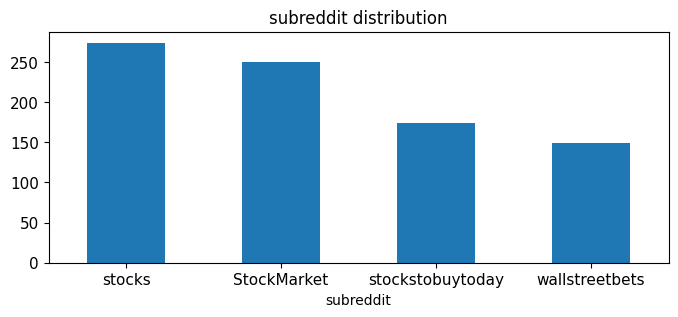

In [9]:
# plot barchart for rebreddit 
new_data_set_df.subreddit.value_counts().plot(kind = 'bar',
                                    title = 'subreddit distribution',        
                                    rot = 0, fontsize = 11, figsize = (8,3))

<Axes: title={'center': 'subreddit distribution sample'}, xlabel='subreddit'>

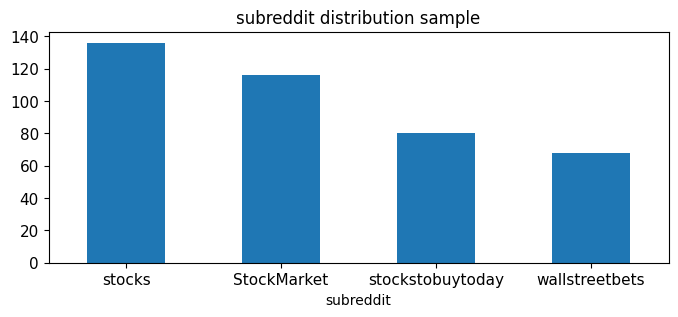

In [10]:
# plot barchart for rebreddit of Sample
new_data_set_df_sample.subreddit.value_counts().plot(kind = 'bar',
                                    title = 'subreddit distribution sample',        
                                    rot = 0, fontsize = 11, figsize = (8,3))

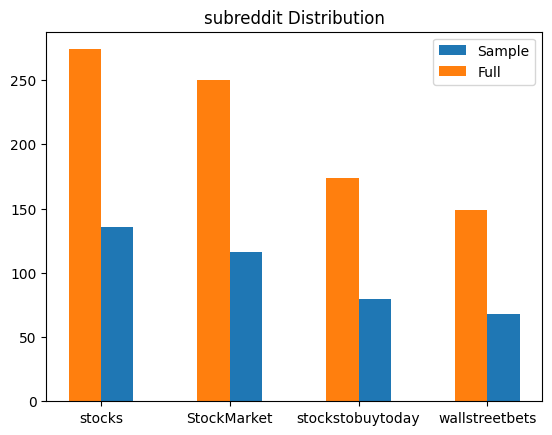

In [11]:
# Plot both sample and full set together
same_labels = (len(new_data_set_df_sample.subreddit.value_counts().index.union(new_data_set_df.subreddit.value_counts().index)) == len(new_data_set_df_sample.subreddit.value_counts().index) 
        == len(new_data_set_df.subreddit.value_counts().index))

if same_labels : # want to plot same labels
    # Creating x for spacing the bars
    bar_width = 0.25
    x_space = np.arange(len(new_data_set_df_sample.subreddit.value_counts().index.union(new_data_set_df_sample.subreddit.value_counts().index)))    
    labels = new_data_set_df_sample.subreddit.value_counts().index.union(new_data_set_df_sample.subreddit.value_counts().index)
    
    # Need to Reindex so the positions do align correctly
    X_sample_reindex = new_data_set_df_sample.subreddit.value_counts().reindex(labels, fill_value=0)
    X_reindex = new_data_set_df.subreddit.value_counts().reindex(labels, fill_value=0)

    # Plotting
    fig,ax = plt.subplots() #Creating subplot to grab several plots in one figure
    ax.bar( x_space+(bar_width/2) ,X_sample_reindex,bar_width, label="Sample")
    ax.bar( x_space-(bar_width/2) ,X_reindex, bar_width, label= "Full")
    plt.xticks(x_space,labels)
    ax.legend()
    plt.title("subreddit Distribution")
    plt.show()
else:
    print("----------- The indexes are different, cannot plot together -----------")

### Feature Creation

In [12]:
new_data_set_df['unigrams'] = new_data_set_df['text'].apply(lambda x: dmh.tokenize_text(x))
print(new_data_set_df["unigrams"][0:4])

0                                 [Calls, on, retards]
1    [Stunt, as, in, like, why, did, they, even, ma...
2          [Seeing, lots, of, red, in, the, ticker, .]
3    [Vision, Marine, Technologies, Inc., is, rewri...
Name: unigrams, dtype: object


### Feature Selection

In [13]:
# ------------------ SPARSE MATRIX CREATION  -------------------------------------------
count_vect_new_data_set = CountVectorizer()
new_data_set_counts = count_vect_new_data_set.fit_transform(new_data_set_df.text) #learn the vocabulary and return document-term matrix
print((new_data_set_counts))




<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 17193 stored elements and shape (847, 4346)>
  Coords	Values
  (0, 692)	1
  (0, 2706)	1
  (0, 3248)	1
  (1, 3696)	1
  (1, 388)	1
  (1, 2024)	2
  (1, 2310)	1
  (1, 4244)	1
  (1, 1168)	1
  (1, 3858)	1
  (1, 1409)	1
  (1, 2402)	1
  (1, 538)	1
  (1, 1083)	1
  (1, 175)	2
  (1, 3628)	1
  (1, 2161)	1
  (1, 3848)	1
  (1, 1568)	1
  (1, 2878)	1
  (1, 2645)	1
  (1, 887)	1
  (1, 3477)	1
  (1, 1412)	2
  (1, 3795)	1
  :	:
  (843, 3866)	1
  (843, 697)	1
  (843, 4229)	1
  (843, 3113)	1
  (844, 3654)	1
  (844, 3144)	1
  (844, 4076)	2
  (844, 2590)	1
  (844, 1241)	2
  (844, 323)	1
  (845, 2706)	1
  (845, 3911)	1
  (845, 4175)	1
  (845, 2580)	1
  (845, 3544)	1
  (845, 1443)	1
  (845, 3049)	1
  (845, 3548)	1
  (845, 1098)	1
  (845, 784)	1
  (845, 1134)	1
  (846, 1999)	1
  (846, 1344)	1
  (846, 3776)	1
  (846, 94)	1


In [14]:
# Full List of Features/Tokens
print(f"1) ---- Full List ----\n : {count_vect_new_data_set.get_feature_names_out()}")

# Getting Particular Feature/Token
print(f"2) ---- The token represents the vocabulary ----\n : {count_vect_new_data_set.get_feature_names_out()[new_data_set_counts.getrow(4).sorted_indices().indices[1]]}")



1) ---- Full List ----
 : ['00' '000' '01378' ... 'zgld' 'zone' 'zsil']
2) ---- The token represents the vocabulary ----
 : he


In [15]:
analyze = count_vect_new_data_set.build_analyzer()
# Toknization throught analyze of first row of text
analyze(new_data_set_df.text[0])



['calls', 'on', 'retards']

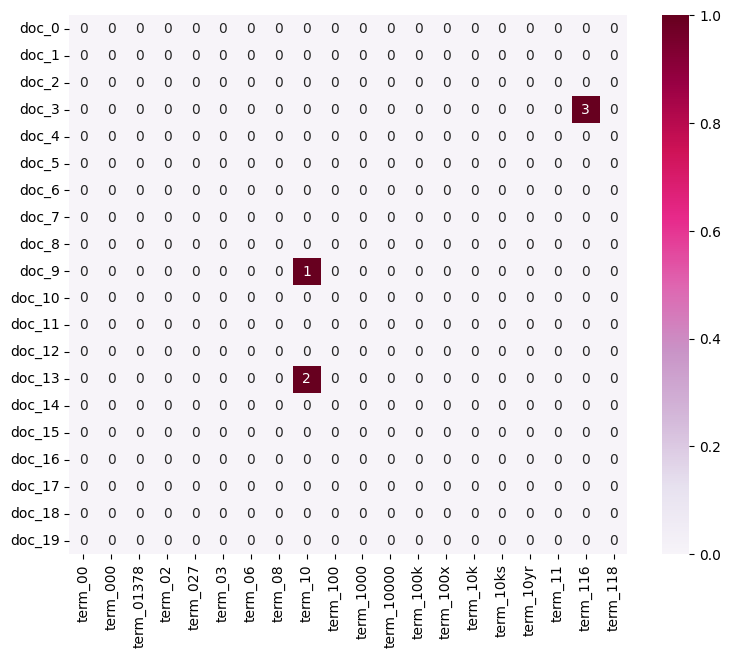

In [16]:
# RAW SPARSE MATRIX HEAT MAP 
plot_x = ["term_"+str(i) for i in count_vect_new_data_set.get_feature_names_out()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(new_data_set_df.index)[0:20]]
dense_matrix = new_data_set_counts[0:20, 0:20].toarray() 


df_todraw = pd.DataFrame(dense_matrix, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

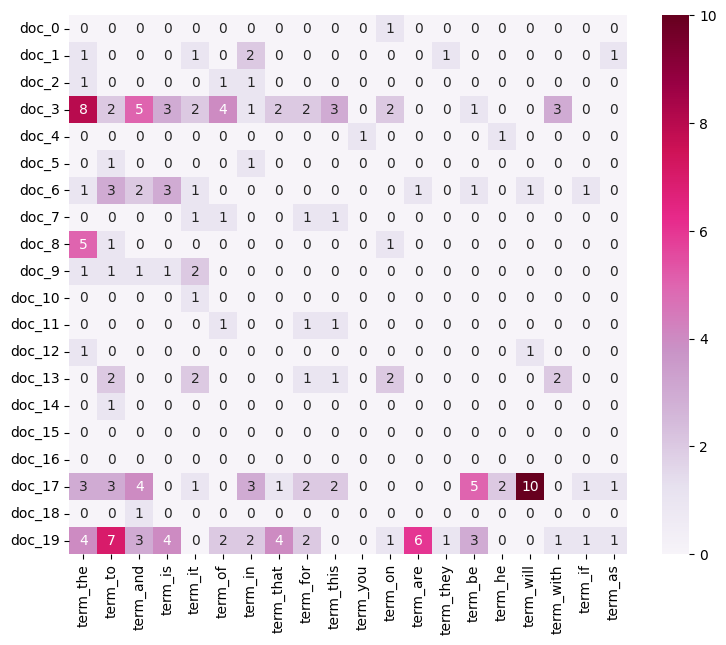

In [17]:

# Same process of creating axis with names
plot_x_exercise = ["term_"+str(i) for i in count_vect_new_data_set.get_feature_names_out()]
plot_y_exercise = ["doc_"+ str(i) for i in list(new_data_set_df.index)]
plot_z_exercise = new_data_set_counts.toarray()
# sum each col which will be used to sort the columns
cols_sum =  plot_z_exercise.sum(axis=0) 
df_todraw_exercise = pd.DataFrame(plot_z_exercise, columns = plot_x_exercise, index = plot_y_exercise)
# Add a row with the sum of each col
df_todraw_exercise.loc["cols_sum"] = cols_sum
#Short the columns based on the sum of each col, so the most frequent tokens will appear first
df_todraw_exercise = df_todraw_exercise.loc[:,(df_todraw_exercise.loc["cols_sum"]).sort_values(ascending=False).index]
# Create a new DF without the sum row
df_dropped_sum = df_todraw_exercise.drop("cols_sum", axis=0)
#Plot, I plot only the top 20 tokens that are more frequent for the first 20 documents.
plt.subplots(figsize=(9, 7))
# I let seaborn determine the color scaling based on the data instead of hardcoding it wiht [0,1]
ax = sns.heatmap(df_dropped_sum.iloc[:20,:20],
                 cmap="PuRd", annot=True)


##### **Comment**:
Stop words tominate the heat map in K importance

## Attribute Transformation / Aggregation


### Transform Text Data

In [18]:
new_data_set_term_frequencies = np.asarray(new_data_set_counts.sum(axis=0))[0]
g = px.bar(x=count_vect_new_data_set.get_feature_names_out()[:300], 
            y=new_data_set_term_frequencies[:300],title="Token Frequencies",labels = {"x":"Tokens","y":"Frequencies"})
g.show()

##### **Comment**:
Hard to analyse plot above

In [19]:
# Remove Stop words, too frequent words and rare words with CountVectorizer
count_vect_cleaned = CountVectorizer(stop_words="english",  # remove built-in English stopwords
    min_df=10,              # keep words in >=10 docs
    max_df=0.90             # drop words that appear too often across docs
)

new_data_set_counts_clean = count_vect_cleaned.fit_transform(new_data_set_df.text) #learn the vocabulary and return document-term matrix

if (new_data_set_counts_clean.shape)<(new_data_set_counts.shape):
    print("---------|The cleaned version has less features, as expected|---------")
    term_frequencies_clean = np.asarray(new_data_set_counts_clean.sum(axis=0))[0]
    g = px.bar(x=count_vect_cleaned.get_feature_names_out()[:300], 
                y=term_frequencies_clean[:300],title="Clean Token Frequencies",labels = {"x":"Filtered Tokens","y":"Frequencies"})
    g.show()



---------|The cleaned version has less features, as expected|---------


In [20]:
# Long tail analysis of cleaned data set

new_data_set_dense_matrix = new_data_set_counts_clean.toarray()
# sum each col which will be used to sort the columns
cols_sum =  new_data_set_dense_matrix.sum(axis=0) 
updated_new_data_set_df = pd.DataFrame(new_data_set_dense_matrix, columns = count_vect_cleaned.get_feature_names_out()
                                  , index = new_data_set_df.index)
# Add a row with the sum of each col
updated_new_data_set_df.loc["cols_sum"] = cols_sum
#Short the columns based on the sum of each col, so the most frequent tokens will appear first
updated_new_data_set_df = updated_new_data_set_df.loc[:,(updated_new_data_set_df.loc["cols_sum"]).sort_values(ascending=False).index]
#Now using plotly I plot the shorted columns based on the sum of each col, so most frequent ones will appear first
grahph_plot = px.bar(x=updated_new_data_set_df.columns, 
            y=updated_new_data_set_df.loc["cols_sum"],title=f"Cleaned Token Frequencies of all {len(updated_new_data_set_df.columns)}",labels = {"x":"Cleaned Tokens","y":"Frequencies"})
grahph_plot.show()


##### **Comment**:
From the long tail, words like Market, Just and Like came on top but I think is more important to notice the 3 most relevant words that are actually related to actual macro economics are Trump, China and Tariffs, this three are the real ones I need to soon into

In [21]:
# Log Transformation of data
term_frequencies_log = [math.log(i) for i in new_data_set_term_frequencies]
graph_plot = px.bar(x=count_vect_new_data_set.get_feature_names_out()[:300], 
                y=term_frequencies_log[:300],title="Log Token Frequencies",labels = {"x":"Cleaned Tokens","y":" Log Frequencies"})
graph_plot.show()


# Cleaned log frequencies plot
cleaned_term_frequencies_log = [math.log(i) for i in term_frequencies_clean]
graph_plot = px.bar(x=count_vect_cleaned.get_feature_names_out()[:300], 
                y=cleaned_term_frequencies_log[:300],title="Log Clean Token Frequencies",labels = {"x":"Cleaned Tokens","y":" Log Frequencies"})
graph_plot.show()


# Cleaned log long tail plot
new_data_set_dense_matrix = new_data_set_counts_clean.toarray()
# sum each col which will be used to sort the columns
cols_sum =  new_data_set_dense_matrix.sum(axis=0) 
log_cols_sum = [math.log(i) for i in cols_sum]
log_updated_new_data_set_df = pd.DataFrame(new_data_set_dense_matrix, columns = count_vect_cleaned.get_feature_names_out()
                                  , index = new_data_set_df.index)
# Add a row with the sum of each col
log_updated_new_data_set_df.loc["cols_sum"] = log_cols_sum
#Short the columns based on the sum of each col, so the most frequent tokens will appear first
log_updated_new_data_set_df = log_updated_new_data_set_df.loc[:,(log_updated_new_data_set_df.loc["cols_sum"]).sort_values(ascending=False).index]
#Now using plotly I plot the shorted columns based on the sum of each col, so most frequent ones will appear first
grahph_plot = px.bar(x=log_updated_new_data_set_df.columns, 
            y=log_updated_new_data_set_df.loc["cols_sum"],title="Log Cleaned Token Frequencies",labels = {"x":"Cleaned Tokens","y":"Log Frequencies"})
grahph_plot.show()



##### **Comment**:
Log and Cleaned graphs give a more organized view of the features, After eliminating stop and too frequent words, can see some words Log dominance is not very big, the distribution is more uniform but words based on my intuition about markets and geo politics as top "recurring" like Market , Trump and China

### New Visualizations

In [22]:
# Creation of lists for Recollecting data for 3D visualization 
sentiment_list =[]
polarity_list = []
subjectivity_list = []
word_list =[]
frequency_list = []


count_x= 0
for token in range(new_data_set_counts.shape[1]):
    mask =(new_data_set_counts[:,token].toarray().ravel()>0)
    freq_sum = new_data_set_counts[:,token].toarray().ravel().sum()
    count_x += 1
    if mask.any():
        sentiment_list.append((new_data_set_df.sentiment[mask].values.sum())/len(new_data_set_df.sentiment[mask].values))
        subjectivity_list.append((new_data_set_df.subjectivity[mask].values.sum())/len(new_data_set_df.subjectivity[mask].values))
        polarity_list.append((new_data_set_df.polarity[mask].values.sum())/len(new_data_set_df.polarity[mask].values))
        word_list.append(count_vect_new_data_set.get_feature_names_out()[token])
        frequency_list.append(freq_sum)
        

# Creation of new DF that contains the frequency, mean Sentiment,  mean subjetivity and mean polarity per token
macro_data_frame = pd.DataFrame({"Frequency":frequency_list,"Polarity":polarity_list,"Sentiment":sentiment_list,"Objetivity":subjectivity_list},index=word_list)

# My list is actually capturing all the columns 
if len(sentiment_list) == new_data_set_counts.shape[1]:
    print("Lists are capturing all information")
else:
    print("List are not capturing all information")

Lists are capturing all information


In [23]:
# Inspection of new DF for plot
Cleaned_macro_data_frame = macro_data_frame.loc[(list(log_updated_new_data_set_df.columns))]
print("1) ---- Shape ----\n",Cleaned_macro_data_frame.shape)
print("2) ---- DF ----\n",Cleaned_macro_data_frame)

1) ---- Shape ----
 (147, 4)
2) ---- DF ----
          Frequency  Polarity  Sentiment  Objetivity
market         111 -0.001957   0.283582    0.379658
just            95  0.058646   0.250000    0.371004
trump           92 -0.007972   0.041667    0.475279
like            83  0.044377   0.289855    0.417180
china           72  0.103210   0.413793    0.411776
...            ...       ...        ...         ...
haven           10  0.107777   0.600000    0.415806
days            10  0.065863   0.200000    0.387186
maybe           10  0.081523   0.200000    0.473383
support         10 -0.041372   0.200000    0.399679
thanks          10  0.201996   1.000000    0.317226

[147 rows x 4 columns]


In [24]:
fig3d = px.scatter_3d(
    macro_data_frame.loc[(list(log_updated_new_data_set_df.columns))],
    x="Frequency",
    y="Polarity",
    z="Objetivity",
    hover_name=macro_data_frame.loc[(list(log_updated_new_data_set_df.columns))].index.astype(str),
    hover_data={"Frequency":":.3f", "Polarity":":.3f", "Objetivity":True},
    title=f"Tokens Polarity vs Subjectivity vs Frequency"
)
fig3d.show()

##### **Comment**:
As previously percieved, Raw numbers make the few words with high distribution dominate the visual, so cant appreate that well, Next plot will use LOG values

In [25]:
# Log transformation
log_Cleaned_macro_data_frame = Cleaned_macro_data_frame.copy()
log_Cleaned_macro_data_frame.Frequency = Cleaned_macro_data_frame.Frequency.apply(lambda x : math.log(x))


In [26]:
fig3d = px.scatter_3d(
    log_Cleaned_macro_data_frame,
    x="Frequency",
    y="Polarity",
    z="Objetivity",
    hover_name=macro_data_frame.loc[(list(log_updated_new_data_set_df.columns))].index.astype(str),
    hover_data={"Frequency":":.3f", "Polarity":":.3f", "Objetivity":True},
    title=f"Tokens Polarity vs Subjectivity vs Frequency"
)


fig3d.show()

##### **Comment**:
I see in the visualization that polarity AVG seems to be close to 0 while some words to deviate but this words are words that denote positive or negative things in its meaning like bad or great, So perhaps further cleaning for this wwords would help have a better look. Objectivity seems to have more variance.

This analysis tries to see if the mean value of each token appeareance in their documents but  the Objectivity and Polarity ratings are NOT initally computed per WORD/TOKEN but per document, something important to take into account. 

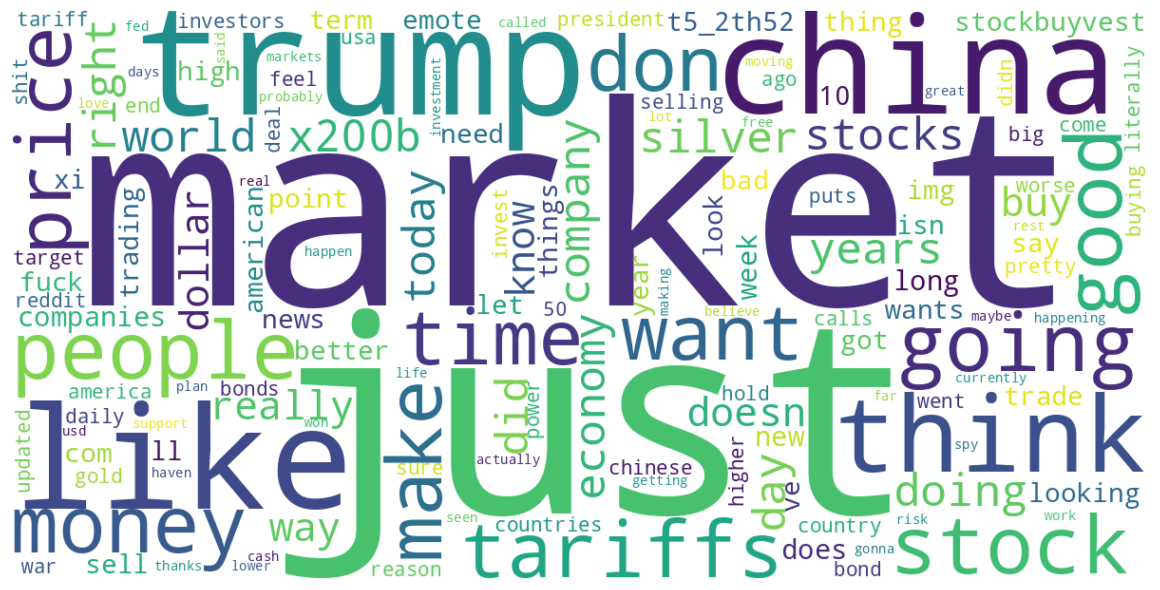

In [27]:
# CLOUD WORD plot
word_freq_dic = log_Cleaned_macro_data_frame.Frequency.to_dict()

wc = (WordCloud(width=1200, height=600, background_color="white", max_words=300)
      .generate_from_frequencies(word_freq_dic))

plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.tight_layout()
plt.show()

##### **Comment**:
As a intitive visualization, this word cloud is pretty good but my opinion is that is not adding any extra layer of analysis compared to the frequency graphs, is good way to present it to non technical shareholders  

In [28]:
# Bigram Analysis and plot
count_vect_cleaned_bigram = CountVectorizer(stop_words="english",  # remove built-in English stopwords
    ngram_range=(2, 2),     # bigram argument <----
    min_df=2,              # keep words in >=2
    max_df=0.95             # remove words that are too often
)

new_data_set_counts_clean_bigram = count_vect_cleaned_bigram.fit_transform(new_data_set_df.text) 

term_frequencies_clean_bigram = np.asarray(new_data_set_counts_clean_bigram.sum(axis=0))[0]
bigrams_series = pd.Series(term_frequencies_clean_bigram,index=count_vect_cleaned_bigram.get_feature_names_out())
sorted_bigrams_series= bigrams_series.sort_values(ascending=False)

grahph_plot = px.bar(x=sorted_bigrams_series.values[:20], 
            y= sorted_bigrams_series.index[:20] ,title="Bigram Frequency Top 20 most important",labels = {"x":"Cleaned Bigram Tokens","y":" Frequencies"},orientation="h")
grahph_plot.show()

# Phase 2

##### **Comment**:
So far witht the actual bigram constructions, it does not seem to display any significant insites yet, perhaps with try and error of different regex patterns, something better could be found.

In [30]:
### Begin Assignment Here
